### Hospital Treatment Pricing Prediction

The increasing cost of healthcare services is a major concern, especially for patients in the US. However, if planned properly, it can be reduced significantly.

The purpose of this project is to predict hospital charges before admitting a patient. 

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install openpyxl
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [129]:
pricing_df = pd.read_excel('raw_data.xlsx')
pricing_df.head()

,SL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,...,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT
0,1,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,...,0.8,AMBULANCE,ALERT,EMERGENCY,660293.0,25,12,13,Y,38000
1,2,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,...,1.7,AMBULANCE,ALERT,EMERGENCY,809130.0,41,20,21,Y,39690
2,3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,...,0.8,WALKED IN,ALERT,ELECTIVE,362231.0,18,9,9,N,0
3,4,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,...,1.5,AMBULANCE,ALERT,EMERGENCY,629990.0,14,13,1,Y,89450
4,5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,...,1.9,AMBULANCE,ALERT,EMERGENCY,444876.0,24,12,12,N,0


In [130]:
pricing_df.dtypes


SL.                               int64
AGE                             float64
GENDER                           object
MARITAL STATUS                   object
KEY COMPLAINTS -CODE             object
BODY WEIGHT                     float64
BODY HEIGHT                       int64
HR PULSE                          int64
BP -HIGH                        float64
BP-LOW                          float64
RR                                int64
PAST MEDICAL HISTORY CODE        object
HB                              float64
UREA                            float64
CREATININE                      float64
MODE OF ARRIVAL                  object
STATE AT THE TIME OF ARRIVAL     object
TYPE OF ADMSN                    object
TOTAL COST TO HOSPITAL          float64
TOTAL LENGTH OF STAY              int64
LENGTH OF STAY - ICU              int64
LENGTH OF STAY- WARD              int64
IMPLANT USED (Y/N)               object
COST OF IMPLANT                   int64
dtype: object

In [131]:
pricing_df.isna().sum()

SL.                               0
AGE                               0
GENDER                            0
MARITAL STATUS                    0
KEY COMPLAINTS -CODE             36
BODY WEIGHT                       0
BODY HEIGHT                       0
HR PULSE                          0
BP -HIGH                         23
BP-LOW                           23
RR                                0
PAST MEDICAL HISTORY CODE       173
HB                                2
UREA                             13
CREATININE                       33
MODE OF ARRIVAL                   0
STATE AT THE TIME OF ARRIVAL      0
TYPE OF ADMSN                     0
TOTAL COST TO HOSPITAL            0
TOTAL LENGTH OF STAY              0
LENGTH OF STAY - ICU              0
LENGTH OF STAY- WARD              0
IMPLANT USED (Y/N)                0
COST OF IMPLANT                   0
dtype: int64

In [132]:
pricing_df.shape

(248, 24)

In [133]:
pricing_df['old_cost'] = pricing_df['TOTAL COST TO HOSPITAL ']
pricing_df['TOTAL COST TO HOSPITAL '] = np.log(pricing_df['TOTAL COST TO HOSPITAL '])

only 250 rows so the empty values can't be dropped as are more than 5% of the dataset and could skew results

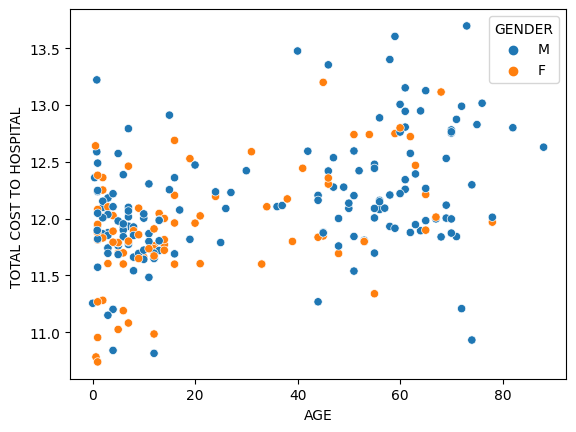

In [134]:
sns.scatterplot(x='AGE',y='TOTAL COST TO HOSPITAL ', data=pricing_df,hue='GENDER')
plt.show()

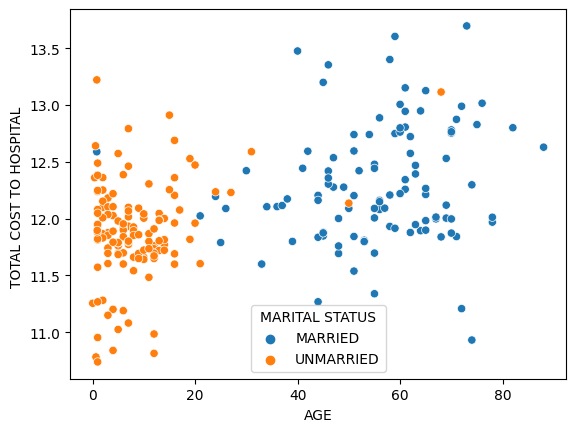

In [135]:
sns.scatterplot(x='AGE',y='TOTAL COST TO HOSPITAL ', data=pricing_df,hue='MARITAL STATUS')
plt.show()

older men seam to be the most costly but below 20 has quite an age gap, married seems too correlate with cost but it's actually more age and the odler the more likely to be married 

In [136]:
age_bins = [0, 20, 40, 60, 80, 100]

# Create labels for each bin
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Use pd.cut() to create the categorical variable
pricing_df['age_group'] = pd.cut(pricing_df['AGE'], bins=age_bins, labels=age_labels, right=True)
pricing_df['age_group'] = pricing_df['age_group'].astype('category')

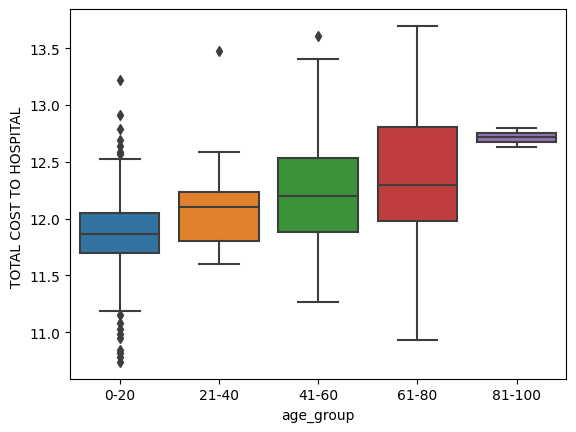

In [137]:
sns.boxplot(x='age_group',y='TOTAL COST TO HOSPITAL ' ,data=pricing_df)
plt.show()

In [138]:
pricing_df['KEY COMPLAINTS -CODE'].value_counts()

KEY COMPLAINTS -CODE
other- heart          55
CAD-DVD               27
RHD                   26
CAD-TVD               24
ACHD                  19
other-tertalogy       18
other- respiratory    15
OS-ASD                15
PM-VSD                 6
other-nervous          3
CAD-SVD                2
CAD-VSD                1
other-general          1
Name: count, dtype: int64

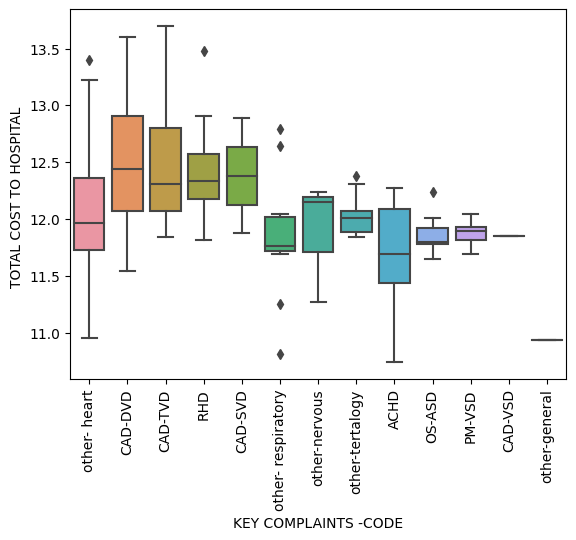

In [139]:
sns.boxplot(x='KEY COMPLAINTS -CODE',y='TOTAL COST TO HOSPITAL ' ,data=pricing_df)
plt.xticks(rotation=90)
plt.show()

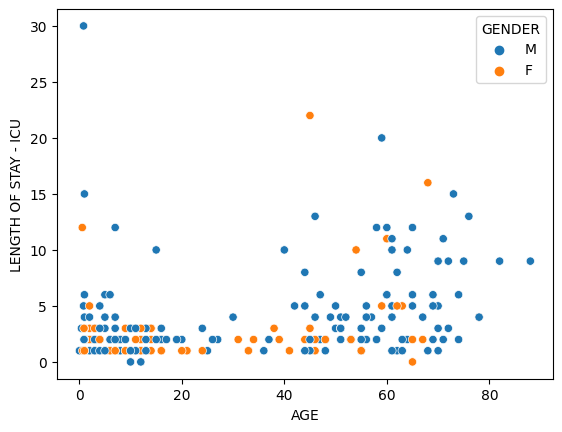

In [140]:
sns.scatterplot(x='AGE',y='LENGTH OF STAY - ICU', data=pricing_df,hue='GENDER')
plt.show()

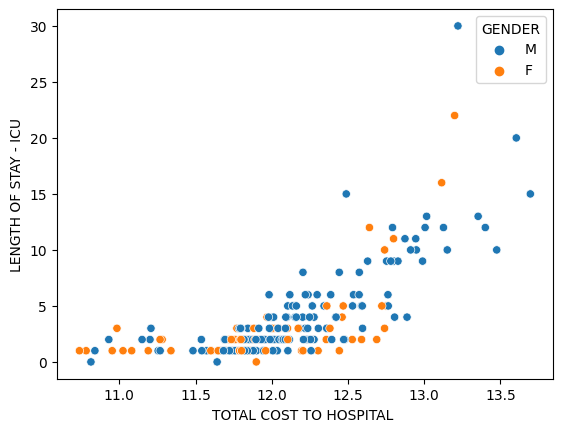

In [141]:
sns.scatterplot(x='TOTAL COST TO HOSPITAL ',y='LENGTH OF STAY - ICU', data=pricing_df,hue='GENDER')
plt.show()

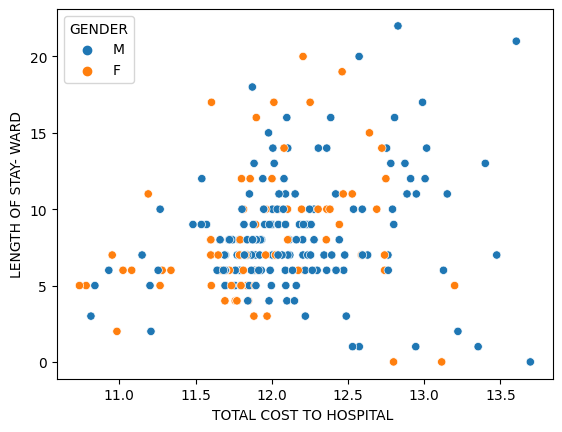

In [142]:
sns.scatterplot(x='TOTAL COST TO HOSPITAL ',y='LENGTH OF STAY- WARD', data=pricing_df,hue='GENDER')
plt.show()

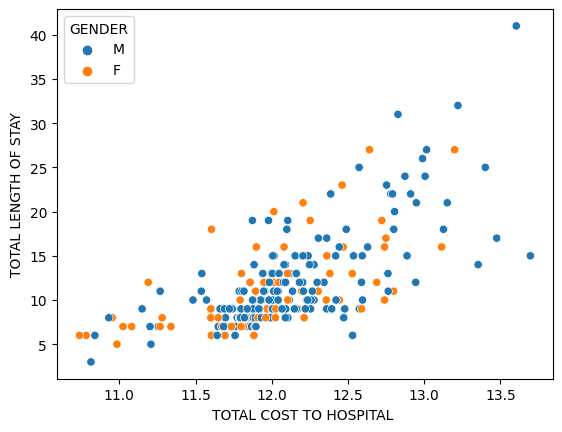

In [143]:
sns.scatterplot(x='TOTAL COST TO HOSPITAL ',y='TOTAL LENGTH OF STAY', data=pricing_df,hue='GENDER')
plt.show()


Total length of stay and ICU stay have a positive correlation with the cost to the hospital - how could this be determined at the beginning it isn't very possible to always know

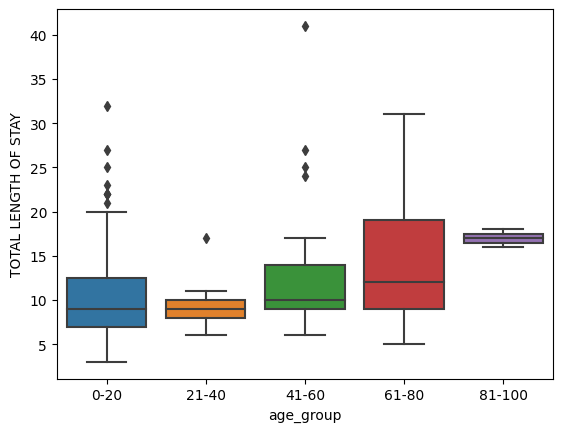

In [144]:
sns.boxplot(x='age_group',y='TOTAL LENGTH OF STAY' ,data=pricing_df)
plt.show()

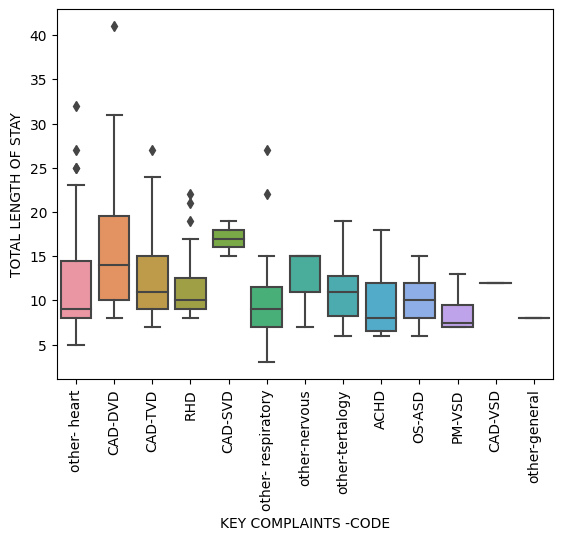

In [145]:
sns.boxplot(x='KEY COMPLAINTS -CODE',y='TOTAL LENGTH OF STAY' ,data=pricing_df)
plt.xticks(rotation=90)
plt.show()

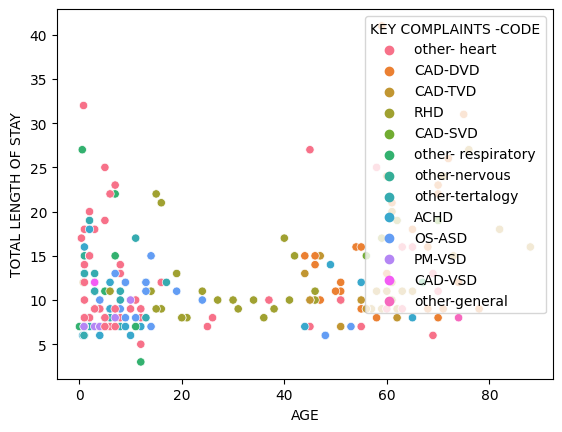

In [146]:
sns.scatterplot(x='AGE',y='TOTAL LENGTH OF STAY', data=pricing_df,hue='KEY COMPLAINTS -CODE')
plt.show()


Some key complaints code have a larger range on length of stay but typically have a nice indication on total length of stay

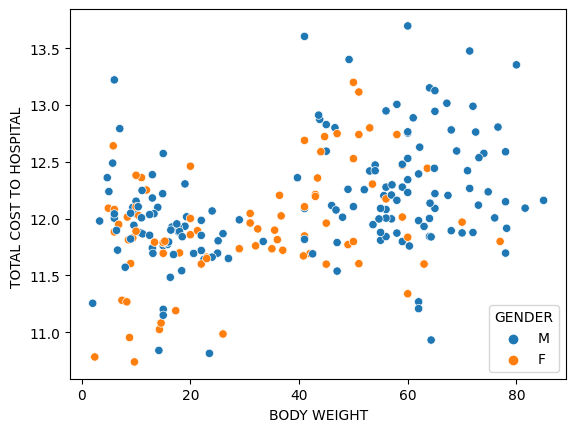

In [147]:
sns.scatterplot(x='BODY WEIGHT',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='GENDER')
plt.show()


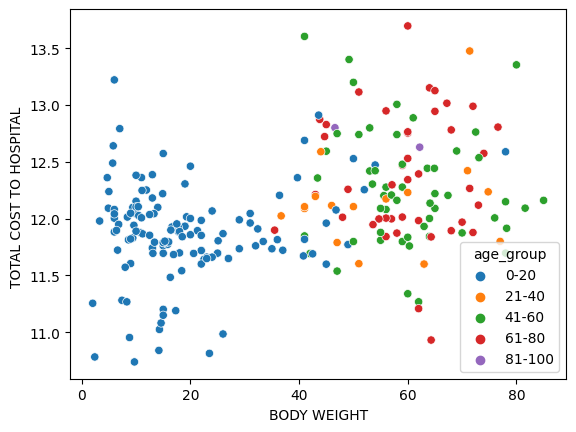

In [148]:
sns.scatterplot(x='BODY WEIGHT',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='age_group')
plt.show()


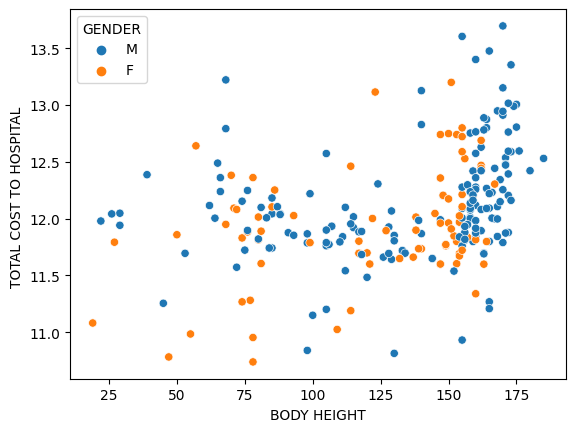

In [149]:
sns.scatterplot(x='BODY HEIGHT',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='GENDER')
plt.show()


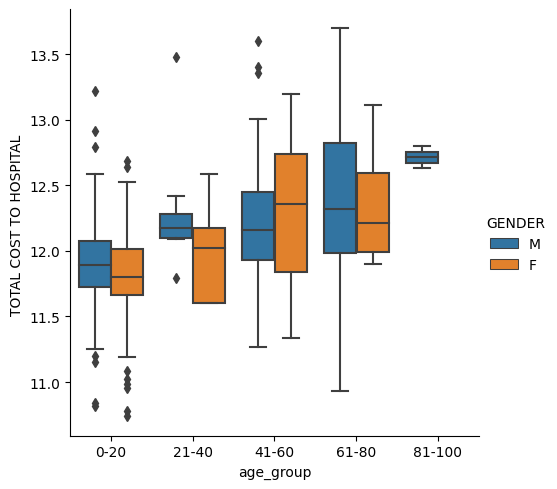

In [150]:
sns.catplot(data=pricing_df,x='age_group',y='TOTAL COST TO HOSPITAL ',kind='box', hue='GENDER')
# the sym '' removes outliers

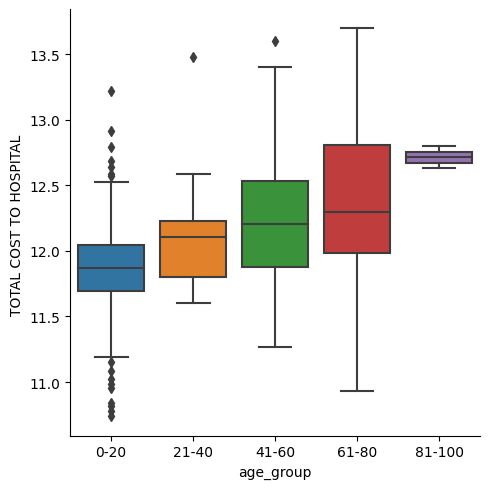

In [151]:
sns.catplot(data=pricing_df,x='age_group',y='TOTAL COST TO HOSPITAL ',kind='box')
# the sym '' removes outliers

So far Age, Key complaints code are strongest correlation.

Body weight has soem correlation for the over 40 category especially 

Gender has some but not a great amount of correlation, simarlarly with height

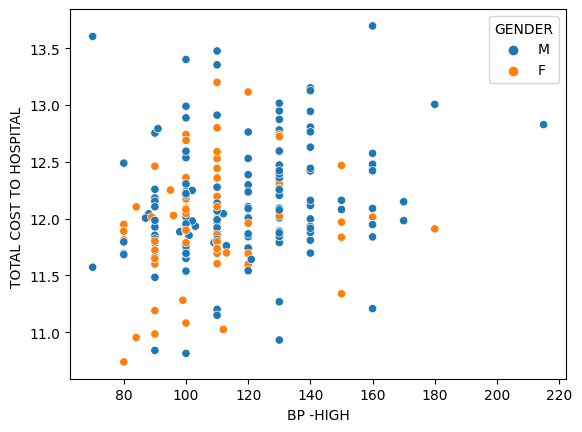

In [152]:
sns.scatterplot(x='BP -HIGH',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='GENDER')
plt.show()


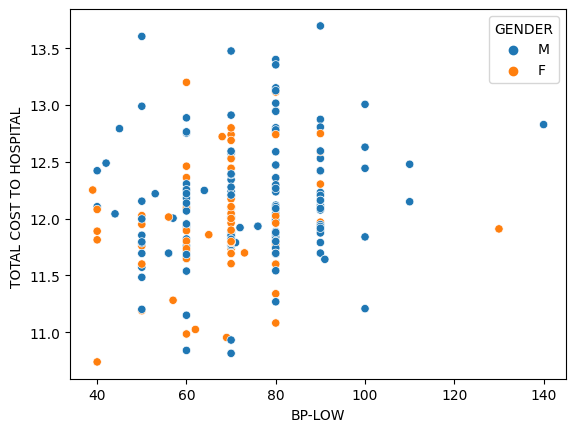

In [153]:
sns.scatterplot(x='BP-LOW',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='GENDER')
plt.show()


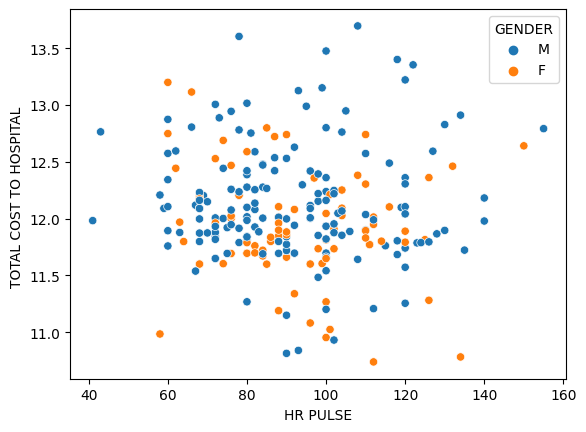

In [154]:
sns.scatterplot(x='HR PULSE',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='GENDER')
plt.show()


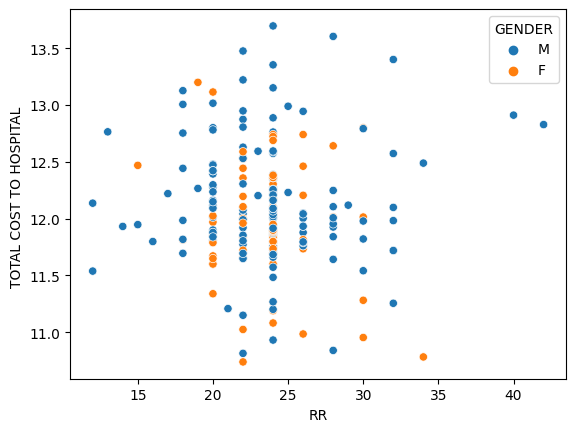

In [155]:
sns.scatterplot(x='RR',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='GENDER')
plt.show()


Blood pressure and pulse doesn't have a strong indicator or RR

In [156]:
pricing_df['PAST MEDICAL HISTORY CODE'] = pricing_df['PAST MEDICAL HISTORY CODE'].fillna('Unknown')

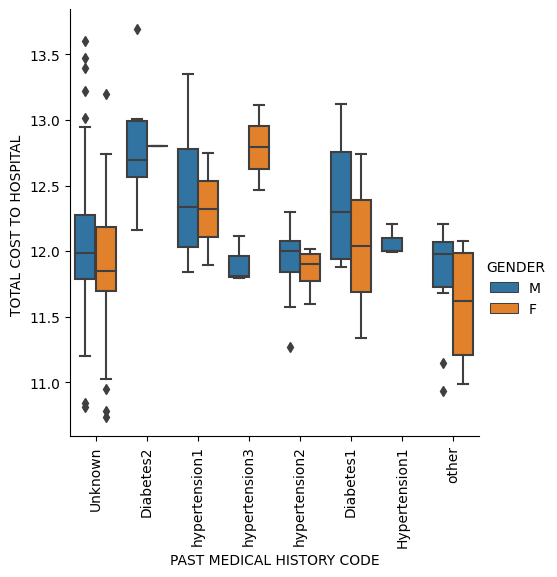

In [157]:
sns.catplot(data=pricing_df,x='PAST MEDICAL HISTORY CODE',y='TOTAL COST TO HOSPITAL ',kind='box', hue='GENDER')
plt.xticks(rotation=90)

# Show the plot
plt.show()

So far Age, Key complaints code are strongest correlation.

Body weight has soem correlation for the over 40 category especially 

Gender has some but not a great amount of correlation, simarlarly with height

Past medical history has quite a bit of variance so may not have a great level of accuracy 

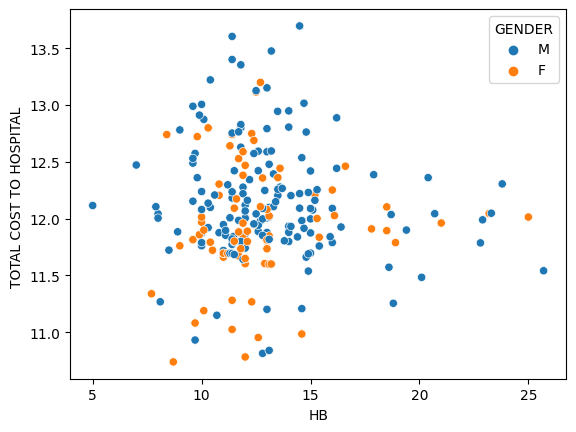

In [158]:
sns.scatterplot(x='HB',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='GENDER')
plt.show()


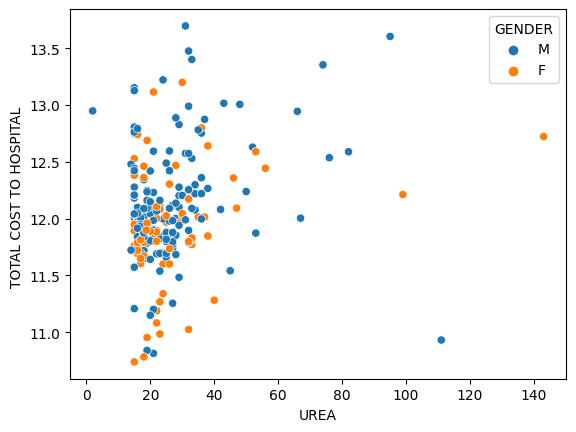

In [159]:
sns.scatterplot(x='UREA',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='GENDER')
plt.show()


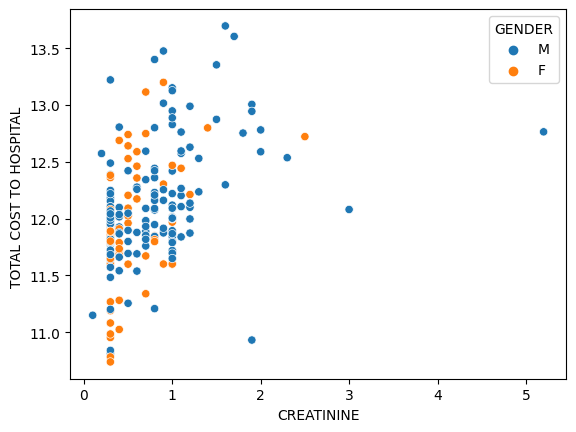

In [160]:
sns.scatterplot(x='CREATININE',y='TOTAL COST TO HOSPITAL ', data=pricing_df, hue='GENDER')
plt.show()


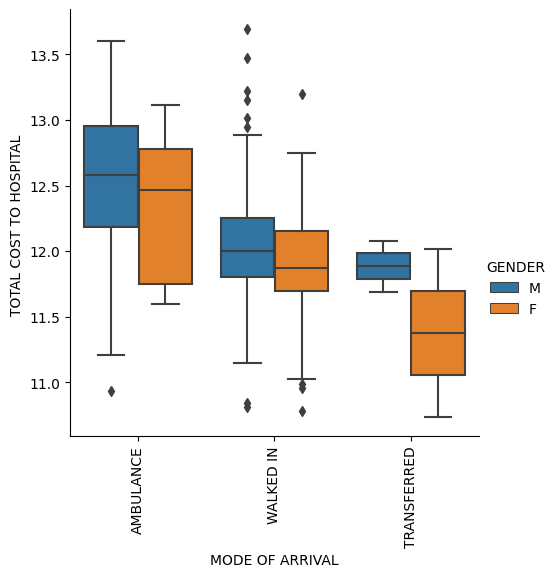

In [161]:
sns.catplot(data=pricing_df,x='MODE OF ARRIVAL',y='TOTAL COST TO HOSPITAL ',kind='box', hue='GENDER')
plt.xticks(rotation=90)

# Show the plot
plt.show()

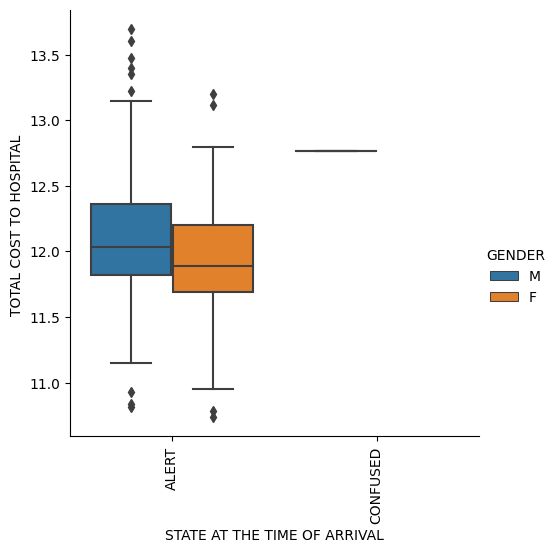

In [162]:
sns.catplot(data=pricing_df,x='STATE AT THE TIME OF ARRIVAL',y='TOTAL COST TO HOSPITAL ',kind='box', hue='GENDER')
plt.xticks(rotation=90)

# Show the plot
plt.show()

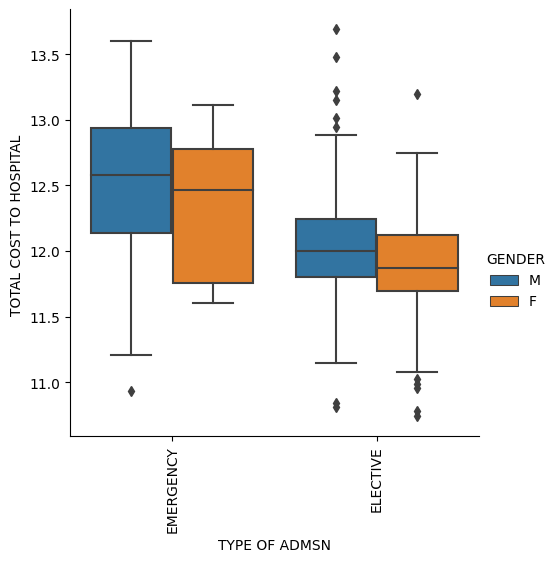

In [163]:
sns.catplot(data=pricing_df,x='TYPE OF ADMSN',y='TOTAL COST TO HOSPITAL ',kind='box', hue='GENDER')
plt.xticks(rotation=90)

# Show the plot
plt.show()

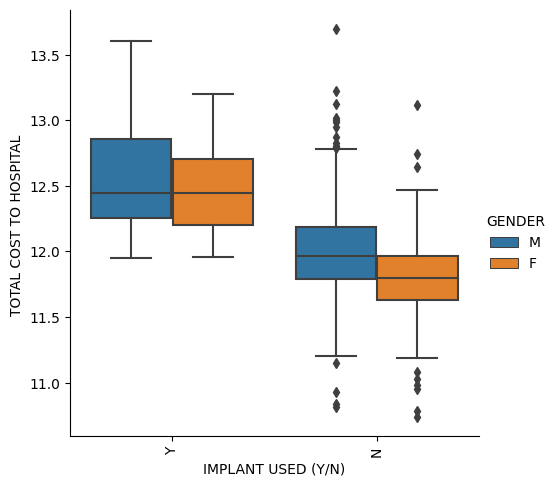

In [164]:
sns.catplot(data=pricing_df,x='IMPLANT USED (Y/N)',y='TOTAL COST TO HOSPITAL ',kind='box', hue='GENDER')
plt.xticks(rotation=90)

# Show the plot
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'other- heart'),
  Text(1, 0, 'CAD-DVD'),
  Text(2, 0, 'CAD-TVD'),
  Text(3, 0, 'RHD'),
  Text(4, 0, 'CAD-SVD'),
  Text(5, 0, 'other- respiratory'),
  Text(6, 0, 'other-nervous'),
  Text(7, 0, 'other-tertalogy'),
  Text(8, 0, 'ACHD'),
  Text(9, 0, 'OS-ASD'),
  Text(10, 0, 'PM-VSD'),
  Text(11, 0, 'CAD-VSD'),
  Text(12, 0, 'other-general')])

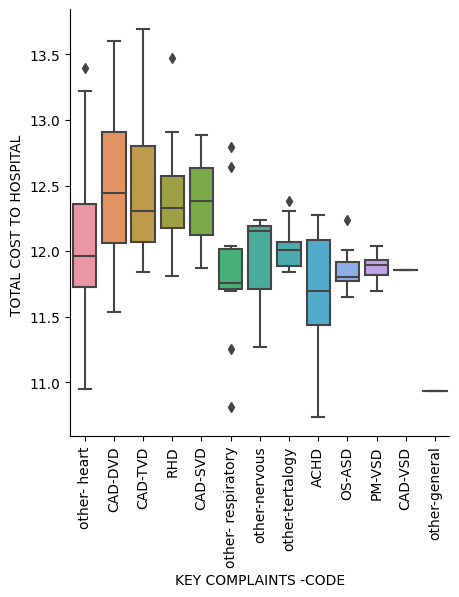

In [165]:
sns.catplot(data=pricing_df,x='KEY COMPLAINTS -CODE',y='TOTAL COST TO HOSPITAL ',kind='box')
plt.xticks(rotation=90)

So far Key complaints, age, body weight, Gender are good indicators but the cost data isn't normally distributed


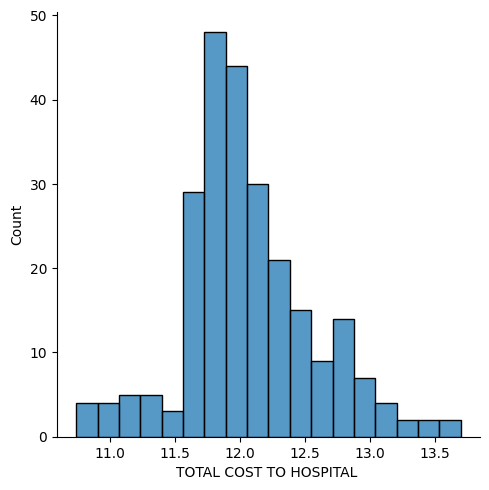

In [166]:
sns.displot(data=pricing_df, x='TOTAL COST TO HOSPITAL ')

In [167]:
# normalised pricing has a positive correlation with length of stay and length of stay ICU

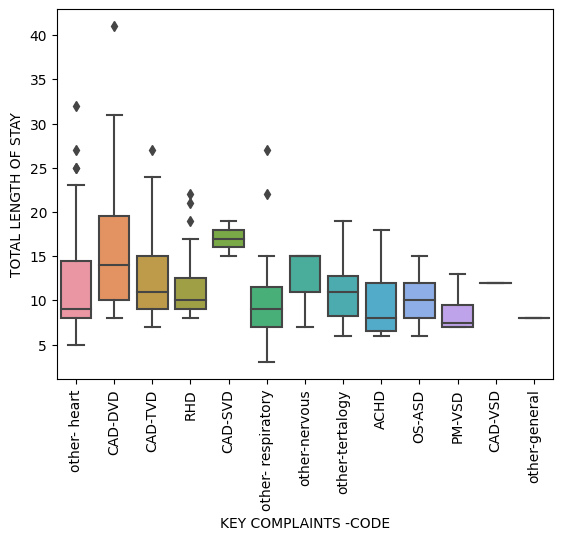

In [168]:
sns.boxplot(x='KEY COMPLAINTS -CODE',y='TOTAL LENGTH OF STAY' ,data=pricing_df)
plt.xticks(rotation=90)
plt.show()

In [169]:
pricing_df.columns

Index(['SL.', 'AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL COST TO HOSPITAL ', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)',
       'COST OF IMPLANT', 'old_cost', 'age_group'],
      dtype='object')

The goal is to predict price ranges for panges, one important factor is total length of stay so we lookat predicting this


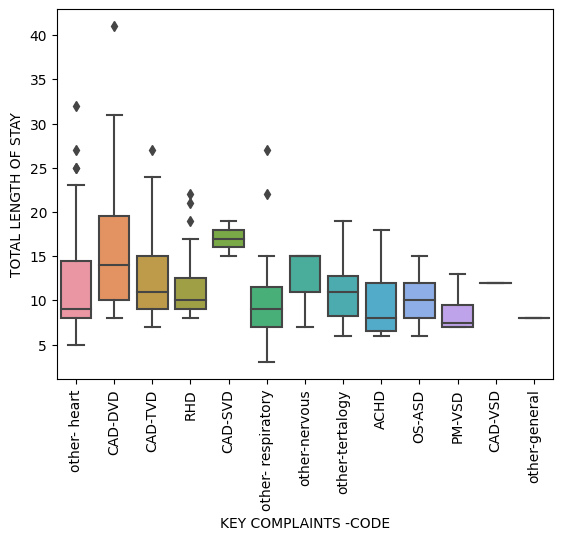

In [170]:
sns.boxplot(x='KEY COMPLAINTS -CODE',y='TOTAL LENGTH OF STAY' ,data=pricing_df)
plt.xticks(rotation=90)
plt.show()

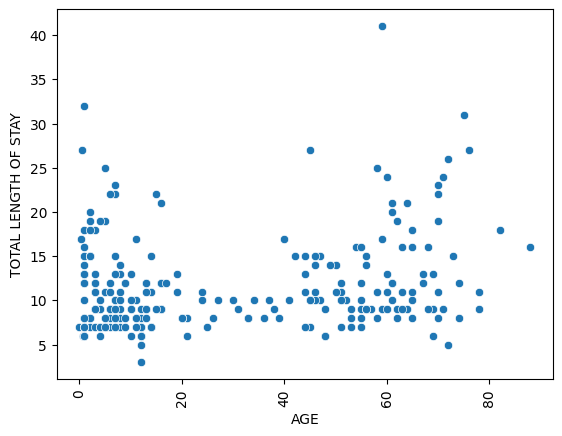

In [171]:
sns.scatterplot(x='AGE',y='TOTAL LENGTH OF STAY' ,data=pricing_df)
plt.xticks(rotation=90)
plt.show()

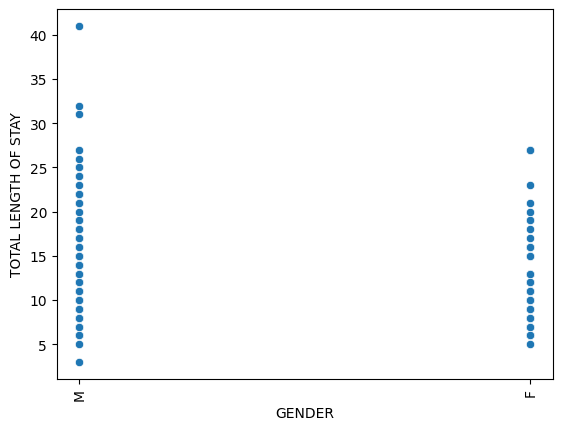

In [172]:
sns.scatterplot(x='GENDER',y='TOTAL LENGTH OF STAY' ,data=pricing_df)
plt.xticks(rotation=90)
plt.show()

In [173]:
pricing_df.columns

Index(['SL.', 'AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL COST TO HOSPITAL ', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)',
       'COST OF IMPLANT', 'old_cost', 'age_group'],
      dtype='object')

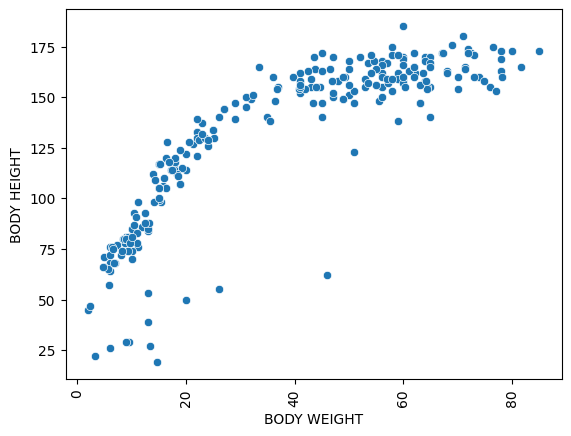

In [174]:
sns.scatterplot(x='BODY WEIGHT',y='BODY HEIGHT' ,data=pricing_df)
plt.xticks(rotation=90)
plt.show()

strong correlation of height and weight 

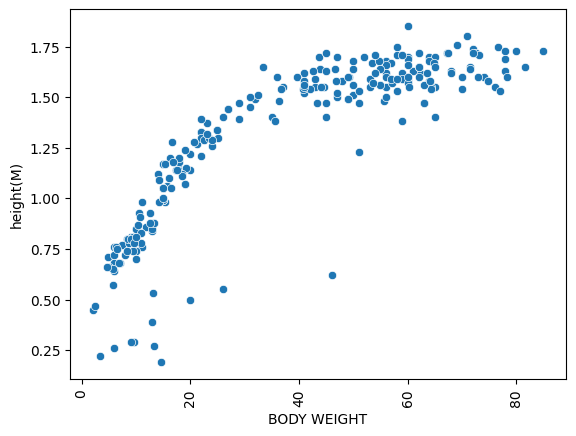

In [175]:
pricing_df['height(M)'] = pricing_df['BODY HEIGHT']/100
sns.scatterplot(x='BODY WEIGHT',y='height(M)' ,data=pricing_df)
plt.xticks(rotation=90)
plt.show()

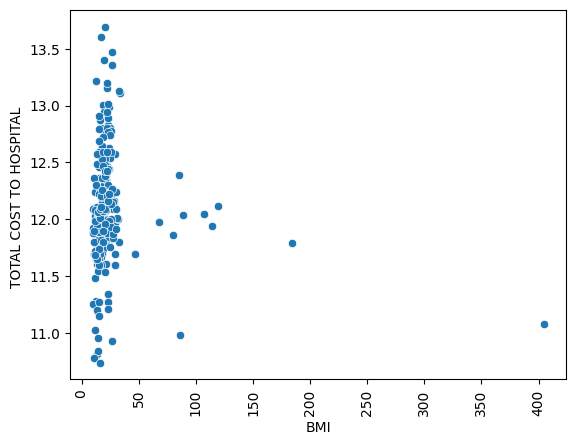

In [176]:
# Step 1: Calculate BMI and create a new column
pricing_df['BMI'] = pricing_df['BODY WEIGHT'] / (pricing_df['height(M)'] ** 2)

# Step 2: Visualize the BMI data if needed
sns.scatterplot(x='BMI', y='TOTAL COST TO HOSPITAL ', data=pricing_df)
plt.xticks(rotation=90)
plt.show()


In [177]:
pricing_df['GENDER'].value_counts()

GENDER
M    166
F     82
Name: count, dtype: int64

    AGE        BMI        bmi_cat
0  58.0  19.218750  Normal weight
1  59.0  17.065557    Underweight
2  82.0  17.325996    Underweight
3  46.0  26.729927     Overweight
4  60.0  18.938776  Normal weight


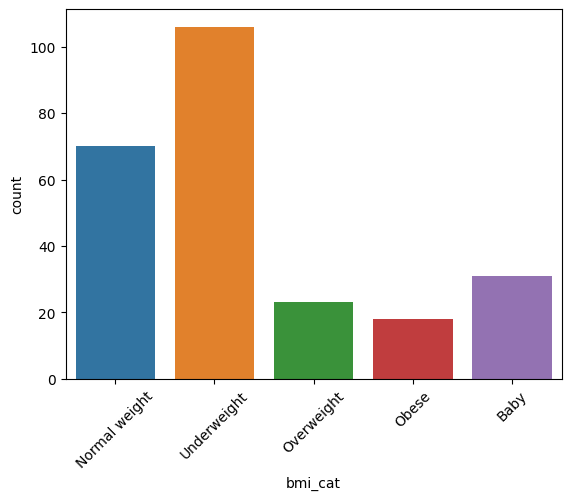

In [178]:
def bmi_category(bmi, age):
    # Categorize as 'Baby' if under 3 years old
    if age < 3:
        return 'Baby'
    
    # Standard BMI categories for age 3 and above
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to your DataFrame
pricing_df['bmi_cat'] = pricing_df.apply(lambda row: bmi_category(row['BMI'], row['AGE']), axis=1)

# Check the new column
print(pricing_df[['AGE', 'BMI', 'bmi_cat']].head())

# You can now visualize or analyze the BMI categories
sns.countplot(x='bmi_cat', data=pricing_df)
plt.xticks(rotation=45)
plt.show()


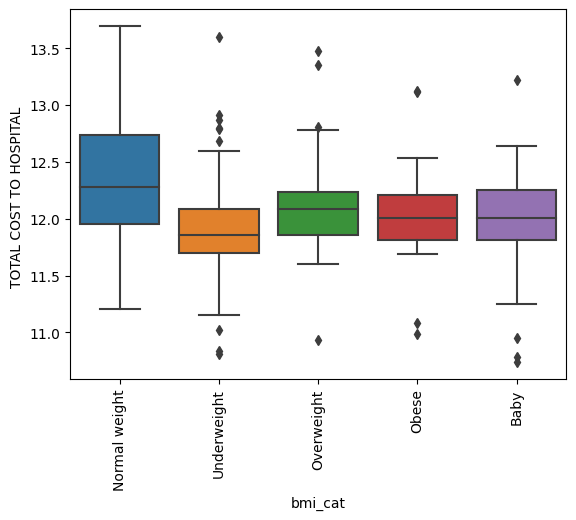

In [179]:
sns.boxplot(x='bmi_cat',y='TOTAL COST TO HOSPITAL ' ,data=pricing_df)
plt.xticks(rotation=90)
plt.show()

In [180]:
pricing_df.isna().sum()

SL.                              0
AGE                              0
GENDER                           0
MARITAL STATUS                   0
KEY COMPLAINTS -CODE            36
BODY WEIGHT                      0
BODY HEIGHT                      0
HR PULSE                         0
BP -HIGH                        23
BP-LOW                          23
RR                               0
PAST MEDICAL HISTORY CODE        0
HB                               2
UREA                            13
CREATININE                      33
MODE OF ARRIVAL                  0
STATE AT THE TIME OF ARRIVAL     0
TYPE OF ADMSN                    0
TOTAL COST TO HOSPITAL           0
TOTAL LENGTH OF STAY             0
LENGTH OF STAY - ICU             0
LENGTH OF STAY- WARD             0
IMPLANT USED (Y/N)               0
COST OF IMPLANT                  0
old_cost                         0
age_group                        0
height(M)                        0
BMI                              0
bmi_cat             

In [181]:
pricing_df.head()

,SL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP -HIGH,BP-LOW,...,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),COST OF IMPLANT,old_cost,age_group,height(M),BMI,bmi_cat
0,1,58.0,M,MARRIED,other- heart,49.2,160,118,100.0,80.0,...,25,12,13,Y,38000,660293.0,41-60,1.60,19.218750,Normal weight
1,2,59.0,M,MARRIED,CAD-DVD,41.0,155,78,70.0,50.0,...,41,20,21,Y,39690,809130.0,41-60,1.55,17.065557,Underweight
2,3,82.0,M,MARRIED,CAD-TVD,46.6,164,100,110.0,80.0,...,18,9,9,N,0,362231.0,81-100,1.64,17.325996,Underweight
3,4,46.0,M,MARRIED,CAD-DVD,80.0,173,122,110.0,80.0,...,14,13,1,Y,89450,629990.0,41-60,1.73,26.729927,Overweight
4,5,60.0,M,MARRIED,CAD-DVD,58.0,175,72,180.0,100.0,...,24,12,12,N,0,444876.0,41-60,1.75,18.938776,Normal weight


In [182]:
pricing_df.dtypes[pricing_df.dtypes == 'object']

GENDER                          object
MARITAL STATUS                  object
KEY COMPLAINTS -CODE            object
PAST MEDICAL HISTORY CODE       object
MODE OF ARRIVAL                 object
STATE AT THE TIME OF ARRIVAL    object
TYPE OF ADMSN                   object
IMPLANT USED (Y/N)              object
bmi_cat                         object
dtype: object

In [183]:
pricing_df_clean = pricing_df.dropna()
categorical_columns = pricing_df_clean.select_dtypes(include=['object', 'category']).columns
columns_to_factorize = categorical_columns.difference(['age_group', 'bmi_cat'])
columns_to_factorize

Index(['GENDER', 'IMPLANT USED (Y/N)', 'KEY COMPLAINTS -CODE',
       'MARITAL STATUS', 'MODE OF ARRIVAL', 'PAST MEDICAL HISTORY CODE',
       'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN'],
      dtype='object')

In [184]:
# Create a list of all columns that are 'object' or 'category' dtype, excluding 'age_group' and 'bmi_cat'
categorical_columns = pricing_df_clean.select_dtypes(include=['object', 'category']).columns
columns_to_factorize = categorical_columns.difference(['age_group', 'bmi_cat'])
unique_age_groups = pricing_df_clean['age_group'].unique()
unique_bmi_cat = pricing_df_clean['bmi_cat'].unique()

# Factorize all relevant categorical columns and use .loc[] to avoid warnings
for col in columns_to_factorize:
    pricing_df_clean.loc[:, col] = pd.factorize(pricing_df_clean[col])[0]

# Use .loc[] for 'age_group' and 'bmi_cat' to set them as ordinal with defined order
pricing_df_clean.loc[:, 'age_group'] = pd.Categorical(
    pricing_df_clean['age_group'], categories=unique_age_groups, ordered=True
).codes

pricing_df_clean.loc[:, 'bmi_cat'] = pd.Categorical(
    pricing_df_clean['bmi_cat'], categories=unique_bmi_cat, ordered=True
).codes


In [185]:




features = pricing_df_clean.drop(columns=['TOTAL COST TO HOSPITAL ','old_cost'])  # Replace with actual columns if needed
target_columns = ['TOTAL COST TO HOSPITAL ']  # Specify target columns

# Dictionary to store results
results = {}

# Loop through each column (target variable)
for column in target_columns:
    X = features
    y = pricing_df_clean[column]
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Determine if the problem is regression or classification
    if pd.api.types.is_numeric_dtype(y):  # Check for regression
        model_type = 'regression'
    else:  # Classification problem (binary or multiclass)
        if len(np.unique(y)) == 2:
            model_type = 'binary_classification'
        else:
            model_type = 'multiclass_classification'
    
    column_results = {}

    # 1. Linear Regression or Logistic Regression
    if model_type == 'regression':
        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        y_pred = lin_reg.predict(X_test)
        column_results['Linear Regression (R²)'] = r2_score(y_test, y_pred)
    else:  # Logistic Regression (for binary/multiclass classification)
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(X_train, y_train)
        y_pred = log_reg.predict(X_test)
        column_results['Logistic Regression (Accuracy)'] = accuracy_score(y_test, y_pred)
    
    # 2. Ridge Regression or RidgeClassifier
    if model_type == 'regression':
        ridge = Ridge()
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        column_results['Ridge (R²)'] = r2_score(y_test, y_pred)
    else:  # Classification case (binary or multiclass)
        ridge = RidgeClassifier()
        ridge.fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        column_results['Ridge (Accuracy)'] = accuracy_score(y_test, y_pred)
    
    # 3. Lasso Regression (only for regression)
    if model_type == 'regression':
        lasso = Lasso()
        lasso.fit(X_train, y_train)
        y_pred = lasso.predict(X_test)
        column_results['Lasso (R²)'] = r2_score(y_test, y_pred)

    # Store the results for this column
    results[column] = column_results

# Display all results
for column, metrics in results.items():
    print(f"\nResults for {column}:")
    for model_name, metric_value in metrics.items():
        print(f"{model_name}: {metric_value}")



Results for TOTAL COST TO HOSPITAL :
Linear Regression (R²): 0.668157547784169
Ridge (R²): 0.6624335981382884
Lasso (R²): 0.6914408518242201


In [186]:



features = pricing_df_clean.drop(columns=['TOTAL COST TO HOSPITAL ','old_cost'])  # Replace with actual columns if needed
target_columns = ['TOTAL COST TO HOSPITAL ', 'TOTAL LENGTH OF STAY']  # Specify target columns

# Dictionary to store results
results = {}

# Step 1: Initialize StandardScaler
scaler = StandardScaler()

# Loop through each target column
for column in target_columns:
    X = features
    y = pricing_df_clean[column]
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 2: Fit the scaler on X_train and transform both X_train and X_test
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Determine if the problem is regression or classification
    if pd.api.types.is_numeric_dtype(y):  # Check for regression
        model_type = 'regression'
    else:  # Classification problem (binary or multiclass)
        if len(np.unique(y)) == 2:
            model_type = 'binary_classification'
        else:
            model_type = 'multiclass_classification'
    
    column_results = {}
    feature_importance = {}
    
    # Store less important and important features based on thresholds
    less_important_features = {}
    important_features = {}

    # 1. Linear Regression
    if model_type == 'regression':
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_scaled, y_train)
        y_pred = lin_reg.predict(X_test_scaled)
        column_results['Linear Regression (R²)'] = r2_score(y_test, y_pred)
        feature_importance['Linear Regression'] = lin_reg.coef_  # Store feature importance


    # Store the results for this column
    results[column] = {
        'metrics': column_results,
        'feature_importance': feature_importance,
        'less_important': less_important_features,
        'important': important_features
    }
    
    # Categorize features into "important" or "less important"
    for model_name, coeffs in feature_importance.items():
        less_important_features[model_name] = []
        important_features[model_name] = []
        
        for feature, coef in zip(X.columns, coeffs):
            if abs(coef) < 0.05:  # If the absolute coefficient is less than 0.5, consider it less important
                less_important_features[model_name].append((feature, coef))
            else:  # Otherwise, it is considered important
                important_features[model_name].append((feature, coef))

# Display results
for column, result in results.items():
    print(f"\nResults for {column}:")
    
    # Display R² or accuracy for each model
    for model_name, score in result['metrics'].items():
        print(f"{model_name}: {score}")
    
    # Display important and less important features for linear models
    for model_name in result['feature_importance']:
        print(f"\nFeature importance for {model_name}:")

        # Display important features
        print("Important features (|coef| >= 0.5):")
        for feature, coef in result['important'][model_name]:
            print(f"{feature}: {coef}")

   



Results for TOTAL COST TO HOSPITAL :
Linear Regression (R²): 0.6681575477841621

Feature importance for Linear Regression:
Important features (|coef| >= 0.5):
SL.: -0.05306914145874916
HR PULSE: 0.05640025255936697
BP -HIGH: 0.05648063186218573
RR: -0.06883978753827255
UREA: -0.12824147511833964
CREATININE: 0.12126909286698201
TOTAL LENGTH OF STAY: -0.16192877685077528
LENGTH OF STAY - ICU: 0.43743723228467224
LENGTH OF STAY- WARD: 0.20599077150794168
IMPLANT USED (Y/N): -0.05855287597202336
COST OF IMPLANT: 0.16835683624767547
age_group: 0.06622759409928697

Results for TOTAL LENGTH OF STAY:
Linear Regression (R²): 1.0

Feature importance for Linear Regression:
Important features (|coef| >= 0.5):
TOTAL LENGTH OF STAY: 5.7580866726871776


This project was focused on performing EDA the data didn't have much linearity and other modeals may have better fit but it was a great practice for a real model.